In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fetch historical stock data
def fetch_stock_data(ticker, start_date, end_date):
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

apple_data = fetch_stock_data("AAPL", "2010-01-01", "2025-01-01")

Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed


In [3]:
print(apple_data.shape)
apple_data.head()

(3774, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447412,6.462175,6.398306,6.429939,493729600
2010-01-05,6.458558,6.495011,6.424515,6.465186,601904800
2010-01-06,6.355827,6.484167,6.349199,6.458559,552160000
2010-01-07,6.344078,6.386859,6.297984,6.379327,477131200
2010-01-08,6.386254,6.386857,6.298285,6.335641,447610800


<Axes: title={'center': 'AAPL Stock Price'}, xlabel='Date'>

<Figure size 500x300 with 0 Axes>

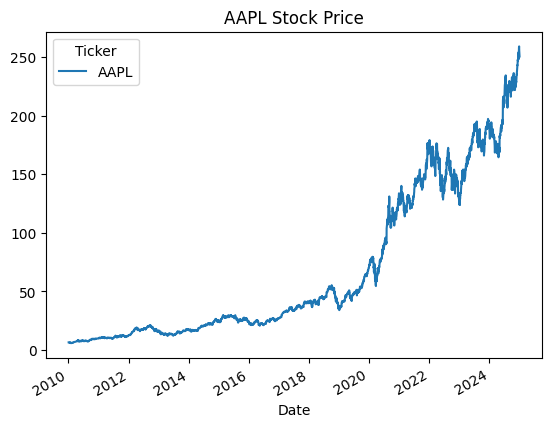

In [4]:
plt.figure(figsize=(5, 3))
apple_data["Close"].plot(title="AAPL Stock Price")

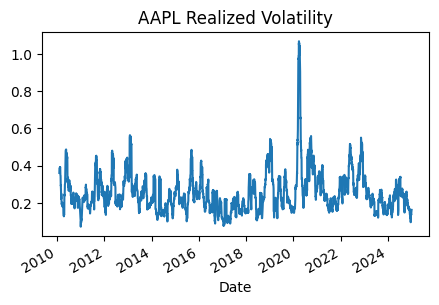

In [5]:
apple_data['returns'] = apple_data['Close'].pct_change()
apple_data['realized volatility'] = apple_data['returns'].rolling(window=21).std() * np.sqrt(252) # 252 trading days in a year

plt.figure(figsize=(5, 3))
apple_data['realized volatility'].plot(title="AAPL Realized Volatility")
plt.show()

# Look at AAPL call options

start_date": 2023-01-01

end_date": 2025-01-17

In [6]:
# load options
options = pd.read_csv("option_data/options_AAPL.csv")
options.head()

,optionSymbol,underlying,expiration,side,strike,firstTraded,dte,updated,bid,bidSize,...,inTheMoney,intrinsicValue,extrinsicValue,underlyingPrice,iv,delta,gamma,theta,vega,rho
0,AAPL250117C00005000,AAPL,1737147600,call,5.0,1706884200,3,1736880122,229.00,71,...,True,229.1696,0.0554,234.1696,14.807,1.000,0.0,-0.075,0.028,0.040
1,AAPL250117C00010000,AAPL,1737147600,call,10.0,1706884200,3,1736880122,223.95,97,...,True,224.1696,0.0554,234.1696,11.871,1.000,0.0,-0.079,0.037,0.081
2,AAPL250117C00015000,AAPL,1737147600,call,15.0,1706884200,3,1736880122,219.00,36,...,True,219.1696,0.0804,234.1696,10.882,0.999,0.0,-0.119,0.061,0.121
3,AAPL250117C00020000,AAPL,1737147600,call,20.0,1706884200,3,1736880122,214.00,31,...,True,214.1696,0.0804,234.1696,9.651,0.999,0.0,-0.121,0.070,0.162
4,AAPL250117C00025000,AAPL,1737147600,call,25.0,1706884200,3,1736880122,208.95,110,...,True,209.1696,0.0554,234.1696,8.248,0.999,0.0,-0.080,0.053,0.204


In [7]:
options.columns

Index(['optionSymbol', 'underlying', 'expiration', 'side', 'strike',
       'firstTraded', 'dte', 'updated', 'bid', 'bidSize', 'mid', 'ask',
       'askSize', 'last', 'openInterest', 'volume', 'inTheMoney',
       'intrinsicValue', 'extrinsicValue', 'underlyingPrice', 'iv', 'delta',
       'gamma', 'theta', 'vega', 'rho'],
      dtype='object')

In [8]:
if 'expiration' in options.columns:
    options['expiration_date'] = pd.to_datetime(options['expiration'], unit='s')
    options['first_traded_date'] = pd.to_datetime(options['firstTraded'], unit='s')
    options['last_updated_date'] = pd.to_datetime(options['updated'], unit='s')
    # remove expiration, firstTraded, and updated columns
    options = options.drop(columns=['expiration', 'firstTraded', 'updated'])

print("\nExpiration Date Range:")
print(f"Min: {options['expiration_date'].min()}, Max: {options['expiration_date'].max()}")

print("\nFirst Traded Date Range:")
print(f"Min: {options['first_traded_date'].min()}, Max: {options['first_traded_date'].max()}")



Expiration Date Range:
Min: 2025-01-17 21:00:00, Max: 2025-01-17 21:00:00

First Traded Date Range:
Min: 2022-09-12 13:30:00, Max: 2025-01-08 14:30:00


In [9]:
options = options.drop(columns=['optionSymbol'])
options.head()

,underlying,side,strike,dte,bid,bidSize,mid,ask,askSize,last,...,underlyingPrice,iv,delta,gamma,theta,vega,rho,expiration_date,first_traded_date,last_updated_date
0,AAPL,call,5.0,3,229.00,71,229.225,229.45,116,229.75,...,234.1696,14.807,1.000,0.0,-0.075,0.028,0.040,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
1,AAPL,call,10.0,3,223.95,97,224.225,224.50,97,240.87,...,234.1696,11.871,1.000,0.0,-0.079,0.037,0.081,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
2,AAPL,call,15.0,3,219.00,36,219.250,219.50,31,218.60,...,234.1696,10.882,0.999,0.0,-0.119,0.061,0.121,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
3,AAPL,call,20.0,3,214.00,31,214.250,214.50,36,216.57,...,234.1696,9.651,0.999,0.0,-0.121,0.070,0.162,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
4,AAPL,call,25.0,3,208.95,110,209.225,209.50,106,216.26,...,234.1696,8.248,0.999,0.0,-0.080,0.053,0.204,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02


In [10]:
filtered_options = options[
    (options['dte'] == 3) &
    (options['expiration_date'] == '2025-01-17 21:00:00')
]
filtered_options

,underlying,side,strike,dte,bid,bidSize,mid,ask,askSize,last,...,underlyingPrice,iv,delta,gamma,theta,vega,rho,expiration_date,first_traded_date,last_updated_date
0,AAPL,call,5.0,3,229.00,71,229.225,229.45,116,229.75,...,234.1696,14.807,1.000,0.0,-0.075,0.028,0.040,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
1,AAPL,call,10.0,3,223.95,97,224.225,224.50,97,240.87,...,234.1696,11.871,1.000,0.0,-0.079,0.037,0.081,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
2,AAPL,call,15.0,3,219.00,36,219.250,219.50,31,218.60,...,234.1696,10.882,0.999,0.0,-0.119,0.061,0.121,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
3,AAPL,call,20.0,3,214.00,31,214.250,214.50,36,216.57,...,234.1696,9.651,0.999,0.0,-0.121,0.070,0.162,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
4,AAPL,call,25.0,3,208.95,110,209.225,209.50,106,216.26,...,234.1696,8.248,0.999,0.0,-0.080,0.053,0.204,2025-01-17 21:00:00,2024-02-02 14:30:00,2025-01-14 18:42:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,AAPL,put,360.0,3,125.65,36,125.825,126.00,23,115.30,...,234.1696,1.767,-0.996,0.0,-0.060,0.275,-2.950,2025-01-17 21:00:00,2024-08-15 13:30:00,2025-01-14 18:42:02
182,AAPL,put,365.0,3,130.65,19,130.800,130.95,5,110.50,...,234.1696,NaN,-0.997,0.0,-0.034,0.188,-2.994,2025-01-17 21:00:00,2024-08-15 13:30:00,2025-01-14 18:42:02
183,AAPL,put,370.0,3,135.50,25,135.750,136.00,18,117.77,...,234.1696,NaN,-1.000,0.0,0.018,0.013,-3.040,2025-01-17 21:00:00,2024-08-15 13:30:00,2025-01-14 18:42:02
184,AAPL,put,375.0,3,140.55,36,140.800,141.05,30,119.75,...,234.1696,NaN,-0.997,0.0,-0.035,0.185,-3.076,2025-01-17 21:00:00,2024-08-15 13:30:00,2025-01-14 18:42:02


In [20]:
# call options
call_options = filtered_options[filtered_options['side'] == 'call']
put_options = filtered_options[filtered_options['side'] == 'put']

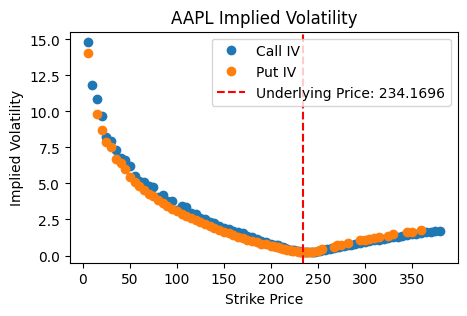

In [21]:
# plot IV
plt.figure(figsize=(5, 3))
# plt.plot(filtered_options['strike'], filtered_options['iv'], 'o')
plt.plot(call_options['strike'], call_options['iv'], 'o', label='Call IV')
plt.plot(put_options['strike'], put_options['iv'], 'o', label='Put IV')

# add underlying price
underlying_price = filtered_options['underlyingPrice'].iloc[0]
plt.axvline(x=underlying_price, color='r', linestyle='--', label=f'Underlying Price: {underlying_price}')
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("AAPL Implied Volatility")
plt.legend()
plt.show()


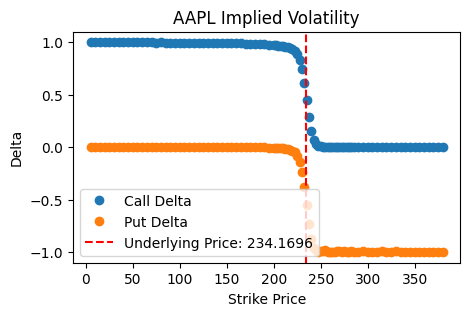

In [ ]:
# plot delta
plt.figure(figsize=(5, 3))
plt.plot(call_options['strike'], call_options['delta'], 'o', label='Call Delta')
plt.plot(put_options['strike'], put_options['delta'], 'o', label='Put Delta')

# add underlying price
underlying_price = filtered_options['underlyingPrice'].iloc[0]
plt.axvline(x=underlying_price, color='r', linestyle='--', label=f'ITM: {underlying_price}')
plt.xlabel("Strike Price")
plt.ylabel("Delta")
plt.title("AAPL Delta")
plt.legend()
plt.show()

# Bid and Ask for call options

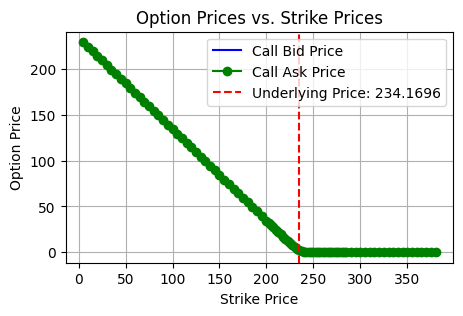

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(call_options['strike'], call_options['bid'], label='Call Bid Price', color='b')
plt.plot(call_options['strike'], call_options['ask'], label='Call Ask Price', marker='o', color='g')

# Add a vertical line at the underlying price
plt.axvline(x=underlying_price, color='r', linestyle='--', label=f'Underlying Price: {underlying_price}')

# Add labels, legend, and title
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('AAPL Call Option Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


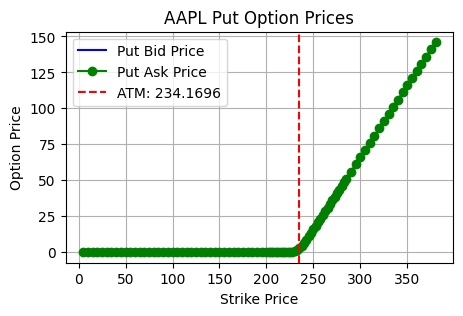

In [24]:
plt.figure(figsize=(5, 3))
plt.plot(put_options['strike'], put_options['bid'], label='Put Bid Price', color='b')
plt.plot(put_options['strike'], put_options['ask'], label='Put Ask Price', marker='o', color='g')
plt.axvline(x=underlying_price, color='r', linestyle='--', label=f'ATM: {underlying_price}')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('AAPL Put Option Prices')
plt.legend()
plt.grid(True)

# Plot Black-Scholes theorectical price

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load options data
options = pd.read_csv("option_data/options_AAPL.csv")

# Convert dte to years
options['T'] = options['dte'] / 365.0
risk_free_rate = 0.03

def black_scholes(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Must be 'call' or 'put'.")

# Apply the Black-Scholes formula to each row
options['bs_price'] = options.apply(
    lambda row: black_scholes(
        S=row['underlyingPrice'],
        K=row['strike'],
        T=row['T'],
        r=risk_free_rate,
        sigma=row['iv'],
        option_type=row['side']
    ),
    axis=1
)

# Display the first few rows with the calculated Black-Scholes price
print(options[['optionSymbol', 'underlyingPrice', 'strike', 'T', 'iv', 'side', 'bs_price']].head())


          optionSymbol  underlyingPrice  strike         T      iv  side  \
0  AAPL250117C00005000         234.1696     5.0  0.008219  14.807  call   
1  AAPL250117C00010000         234.1696    10.0  0.008219  11.871  call   
2  AAPL250117C00015000         234.1696    15.0  0.008219  10.882  call   
3  AAPL250117C00020000         234.1696    20.0  0.008219   9.651  call   
4  AAPL250117C00025000         234.1696    25.0  0.008219   8.248  call   

     bs_price  
0  229.193912  
1  224.194486  
2  219.215385  
3  214.214835  
4  209.196921  
